In [1]:
# In this notebook, we explore the 'MARRIAGE' subset of the Taiwan Credit Default dataset.
# The intention is to use Marriage as the Protected Variable.

In [2]:
# Import Data handling/display libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the Taiwan Credit Card Default training dataset
Taiwan_df = pd.read_csv('./input/Taiwan-Credit-Card-New.csv')

In [4]:
# Create MARRIED & SINGLE subset of the dataset
Taiwan_df = Taiwan_df.loc[(Taiwan_df['MARRIAGE'] ==1) | (Taiwan_df['MARRIAGE'] ==2)]
Taiwan_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Rename a couple of columns for aesthetics
Taiwan_df.rename(columns={'SEX':'GENDER', 'PAY_0': 'PAY_1',
                          'default payment next month':'DEFAULT'}, 
                          inplace=True)
# Drop ID as it has no impact on this study.
Taiwan_df.drop(["ID"], axis=1, inplace=True)

In [6]:
# How many (rows, columns)
Taiwan_df.shape

(29623, 24)

In [7]:
#Taiwan_df[['GENDER','EDUCATION', 'MARRIAGE', 'AGE']].describe()

In [8]:
#Taiwan_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


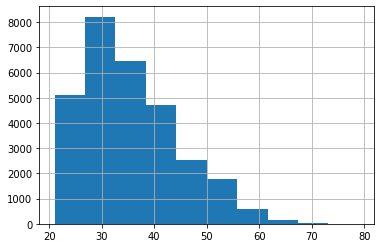

In [9]:
# What is the age distribution
print(Taiwan_df.AGE.hist())

In [10]:
# How many people are married etc. (1 = married; 2 = single; 3,0 = others)
print('Most of the individuals in the dataset ate single, followed by married')
Taiwan_df['MARRIAGE'].value_counts()

Most of the individuals in the dataset ate single, followed by married


2    15964
1    13659
Name: MARRIAGE, dtype: int64

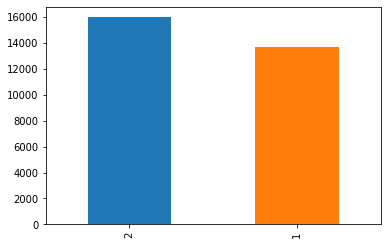

In [11]:
# Plot distribution of Marriage (1 = married; 2 = single; 3,0 = others)
Taiwan_df.MARRIAGE.value_counts().plot(kind = 'bar')

In [12]:
# Educational distribution (1=grad school; 2=university; 3=high school; 0,4, 5, 6=others)
Taiwan_df.EDUCATION.value_counts() 

2    13862
1    10531
3     4770
5      277
4      120
6       49
0       14
Name: EDUCATION, dtype: int64

In [13]:
# Count how many men(1) & women (2)
Taiwan_df.GENDER.value_counts()

2    17880
1    11743
Name: GENDER, dtype: int64

In [14]:
### get into the meat of whats what
#gender = Taiwan_df.groupby(['MARRIAGE', 'DEFAULT']).size().unstack(1)
gender = Taiwan_df.groupby(['MARRIAGE', 'DEFAULT']).size()
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender

MARRIAGE  DEFAULT
1         0          10453
          1           3206
2         0          12623
          1           3341
dtype: int64

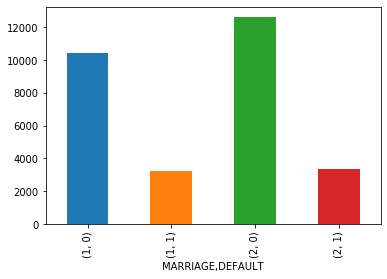

In [15]:
# Plot chart of number of women who've defaulted etc.
gender.plot(kind='bar', stacked = True)

In [16]:
# Calculate the percentages of male / females who have defaulted
PercentDefaults = MalePercentDefaults = FemalePercentDefaults = 0
TotalRows            = len(Taiwan_df)
TotalDefaults        = len(Taiwan_df[Taiwan_df["DEFAULT"]==1])
TotalNonDefaults     = len(Taiwan_df[Taiwan_df["DEFAULT"]==0])
MarriedDefaults      = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["MARRIAGE"]==1)])
SingleDefaults       = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["MARRIAGE"]==2)])
PercentDefaults      = (100*TotalDefaults) / TotalRows
MarriedPercentDefaults  = (100*MarriedDefaults) / TotalDefaults
SinglePercentDefaults= (100*SingleDefaults) / TotalDefaults

print('Total number of examples     : ', TotalRows)
print('Number of Defaults           : ', TotalDefaults) 
print('Number of NonDefaults        : ', TotalNonDefaults) 
print('Number of Married defaults   : ', MarriedDefaults)
print('Number of Single defaults    : ', SingleDefaults)
print('Percentage of Defaults       : ', PercentDefaults,'%')
print('Defaults - Married percentage: ', MarriedPercentDefaults,'%')
print('Defaults - Single percentage : ', SinglePercentDefaults,'%')
print('')
print('Checksum of all Marriage Percentages: ', MarriedPercentDefaults + SinglePercentDefaults)

Total number of examples     :  29623
Number of Defaults           :  6547
Number of NonDefaults        :  23076
Number of Married defaults   :  3206
Number of Single defaults    :  3341
Percentage of Defaults       :  22.101070114438105 %
Defaults - Married percentage:  48.96899343210631 %
Defaults - Single percentage :  51.03100656789369 %

Checksum of all Marriage Percentages:  100.0


In [17]:
# Calculate the percentages of married / single male / females who have defaulted
MarriedMalePercent = MarriedMaleDefaultPercent = MarriedFemalePercent = MarriedFemaleDefaultPercent = 0 
MalesPercent = FemalesPercent = TotalMales = TotalFemales = Ratio_F_M = 0
TotalRows            = len(Taiwan_df)
TotalMarried         = len(Taiwan_df[Taiwan_df["GENDER"]==1])
TotalSingle          = len(Taiwan_df[Taiwan_df["GENDER"]==2])
TotalDefaults        = len(Taiwan_df[Taiwan_df["DEFAULT"]==1])

MarriedMales         = len(Taiwan_df[(Taiwan_df["GENDER"]==1)  & (Taiwan_df["MARRIAGE"]==1)])
MarriedFemales       = len(Taiwan_df[(Taiwan_df["GENDER"]==2)  & (Taiwan_df["MARRIAGE"]==1)])
MarriedMaleDefaults  = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==1) & (Taiwan_df["MARRIAGE"]==1)])
MarriedFemaleDefaults= len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==2) & (Taiwan_df["MARRIAGE"]==1)])

SingleMales          = len(Taiwan_df[(Taiwan_df["GENDER"]==1)  & (Taiwan_df["MARRIAGE"]==2)])
SingleFemales        = len(Taiwan_df[(Taiwan_df["GENDER"]==2)  & (Taiwan_df["MARRIAGE"]==2)])
SingleMaleDefaults   = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==1) & (Taiwan_df["MARRIAGE"]==2)])
SingleFemaleDefaults = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==2) & (Taiwan_df["MARRIAGE"]==2)])

OtherMarriage        = len(Taiwan_df[(Taiwan_df["MARRIAGE"]==3)])
OtherMarriageDefaults= len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["MARRIAGE"]==3)])
OtherMarriagePercent = (100*OtherMarriage) / TotalRows
OtherMarriageDefaultP= (100*OtherMarriageDefaults) / TotalDefaults

MalesPercent                = (100*TotalMales)   / TotalRows
FemalesPercent              = (100*TotalFemales) / TotalRows

MarriedMalePercent          = (100*MarriedMales) / TotalRows
MarriedMaleDefaultPercent   = (100*MarriedMaleDefaults) / TotalDefaults
MarriedFemalePercent        = (100*MarriedFemales) / TotalRows
MarriedFemaleDefaultPercent = (100*MarriedFemaleDefaults) / TotalDefaults

SingleMalePercent           = (100*SingleMales) / TotalRows
SingleMaleDefaultPercent    = (100*SingleMaleDefaults) / TotalDefaults
SingleFemalePercent         = (100*SingleFemales) / TotalRows
SingleFemaleDefaultPercent  = (100*SingleFemaleDefaults) / TotalDefaults

TotalMales = TotalFemales   = Ratio_F_M = 0
Ratio_Married_F_M = Ratio_Single_F_M = Ratio_Defa_Married_F_M = Ratio_Defa_Single_F_M = 0 
TotalMales                  = len(Taiwan_df[Taiwan_df["GENDER"]==1])
TotalFemales                = len(Taiwan_df[Taiwan_df["GENDER"]==2])
Ratio_F_M                   = TotalFemales / TotalMales
Ratio_Married_F_M           = MarriedFemales / MarriedMales
Ratio_Single_F_M            = SingleFemales / SingleMales
Ratio_Defa_Married_F_M      = MarriedFemaleDefaults / MarriedMaleDefaults
Ratio_Defa_Single_F_M       = SingleFemaleDefaults  / SingleMaleDefaults

print('Total number of examples         : ', TotalRows)
print('Total number of Males            : ', TotalMales, ' ', MalesPercent,'%')
print('Total number of Females          : ', TotalFemales, ' ', FemalesPercent,'%')
print('Ratio of Females to Males        : ', Ratio_F_M)
print('Total number of Other            : ', OtherMarriage, '    ',OtherMarriagePercent, '%')
print('Number of Defaults               : ', TotalDefaults,'  ',PercentDefaults,'%') 
print('')
print('Percentage of Married Males      : ', MarriedMalePercent)
print('Percentage of Married Females    : ', MarriedFemalePercent)
print('Ratio of Married Females to Males: ', Ratio_Single_F_M)
print('')
print('Percentage of Single Males       : ', SingleMalePercent)
print('Percentage of Single Females     : ', SingleFemalePercent)
print('Ratio of Single  Females to Males: ', Ratio_Married_F_M)
print('Checksum of all Marriage Percentages : ', MarriedMalePercent + MarriedFemalePercent + SingleMalePercent + SingleFemalePercent + OtherMarriagePercent)
print('')
print('Number of Married Male defaults  : ', MarriedMaleDefaults)
print('Number of Married Female defaults: ', MarriedFemaleDefaults)
print('Ratio of Married+Defaulted Females to Males : ',Ratio_Defa_Married_F_M)
print(' ')
print('Number of Single Male defaults   : ', SingleMaleDefaults)
print('Number of Single Female defaults : ', SingleFemaleDefaults)
print('Ratio of Single +Defaulted Females to Males : ',Ratio_Defa_Single_F_M)
print(' ')
print('Number of Other Married defaults : ', OtherMarriageDefaults)
print('Checksum of all Marriage defaults: ', MarriedMaleDefaults + MarriedFemaleDefaults + SingleMaleDefaults + SingleFemaleDefaults + OtherMarriageDefaults)
print('')
print('Percentage Default Married Males : ', MarriedMaleDefaultPercent)
print('Percentage Default Married Females:', MarriedFemaleDefaultPercent)
print('Percentage Default Single Males  : ', SingleMaleDefaultPercent)
print('Percentage Default Single Females: ', SingleFemaleDefaultPercent)
print('Percentage Default Other Marriage: ', OtherMarriageDefaultP)
print('Checksum of all Default Percentages:', MarriedMaleDefaultPercent + MarriedFemaleDefaultPercent + SingleMaleDefaultPercent + SingleFemaleDefaultPercent + OtherMarriageDefaultP)
#print('Number of Marriage Other defaults: ', OtherMarriageDefaultP)

Total number of examples         :  29623
Total number of Males            :  11743   0.0 %
Total number of Females          :  17880   0.0 %
Ratio of Females to Males        :  1.5226092139998297
Total number of Other            :  0      0.0 %
Number of Defaults               :  6547    22.101070114438105 %

Percentage of Married Males      :  17.520170138068394
Percentage of Married Females    :  28.589271849576342
Ratio of Married Females to Males:  1.4361361208606744

Percentage of Single Males       :  22.12132464638963
Percentage of Single Females     :  31.769233365965636
Ratio of Single  Females to Males:  1.631791907514451
Checksum of all Marriage Percentages :  100.0

Number of Married Male defaults  :  1346
Number of Married Female defaults:  1860
Ratio of Married+Defaulted Females to Males :  1.3818722139673105
 
Number of Single Male defaults   :  1485
Number of Single Female defaults :  1856
Ratio of Single +Defaulted Females to Males :  1.2498316498316497
 
Number of Ot

In [18]:
#Ratios 
TotalMales = TotalFemales = Ratio_F_M = 0
Ratio_Married_F_M = Ratio_Single_F_M = Ratio_Defa_Married_F_M = Ratio_Defa_Single_F_M = 0 
TotalMales             = len(Taiwan_df[Taiwan_df["GENDER"]==1])
TotalFemales           = len(Taiwan_df[Taiwan_df["GENDER"]==2])
Ratio_F_M              = TotalFemales / TotalMales
Ratio_Married_F_M      = MarriedFemales / MarriedMales
Ratio_Single_F_M       = SingleFemales / SingleMales
Ratio_Defa_Married_F_M = MarriedFemaleDefaults / MarriedMaleDefaults
Ratio_Defa_Single_F_M  = SingleFemaleDefaults  / SingleMaleDefaults

print('Ratio of Females to Males                   : ', Ratio_F_M)
print('Ratio of Married Females to Males           : ', Ratio_Single_F_M)
print('Ratio of Single  Females to Males           : ', Ratio_Married_F_M)
print('Ratio of Married+Defaulted Females to Males : ',Ratio_Defa_Married_F_M)
print('Ratio of Single +Defaulted Females to Males : ',Ratio_Defa_Single_F_M)

Ratio of Females to Males                   :  1.5226092139998297
Ratio of Married Females to Males           :  1.4361361208606744
Ratio of Single  Females to Males           :  1.631791907514451
Ratio of Married+Defaulted Females to Males :  1.3818722139673105
Ratio of Single +Defaulted Females to Males :  1.2498316498316497


In [19]:
# Use this to get the average of all columns for each value of DEFAULT
Taiwan_df.groupby('DEFAULT').mean()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
DEFAULT,,,,,,,,,,,,,,,,,,,,,
0,178931.443924,1.613798,1.835110,1.547019,35.337797,-0.213555,-0.303389,-0.317689,-0.356474,-0.390362,...,47696.993023,43798.297539,40707.913893,39189.658606,6283.82848,6620.012307,5737.164110,5296.068686,5251.803995,5752.308676
1,130845.834733,1.567588,1.890484,1.510310,35.626088,0.669161,0.458072,0.358638,0.249580,0.166488,...,45315.334657,42169.723232,39694.272644,38440.813502,3398.31587,3387.939056,3387.148159,3171.134260,3238.449672,3437.120208


In [20]:
#https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook/